# TP 1 : acquisition d’un signal audio

## Étude de la quantification
### 1/ Quantum
On definie le quantum comme étant :
q = 2A/2^N
### 2/ Bruit de quantidication
Avec un arrondisement au plus proche quantum on a:
E(q) = 0
et
1/q de [-q/2;q/2]
### 3/ Facteur de Charge
On def le facteur de charge :
F =  A/sqrt(var(x))
### 4/ A faire


## Rééchantillonnage et repliement spectral

# En séance

In [1]:
import os

import numpy as np
import sounddevice as sd
import pandas as pd
from scipy.io import wavfile
from scipy.signal import spectrogram
from scipy import fft
import matplotlib.pyplot as plt
from files.quantif import quantif
import numpy as np
from IPython.display import Audio
try:
    import plotly
    # pd.options.plotting.backend = "plotly"
except Exception as e:
    print("plotly not installed : Using matplotlib")

from files.tools import QuantifierComparator, plot_signal

In [2]:
enable_audio = True

## 1 - Chargement du signal et normalisation

On charge le signal puis le normalise en le divisant par $2^{N-1}$

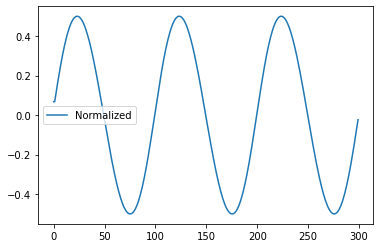

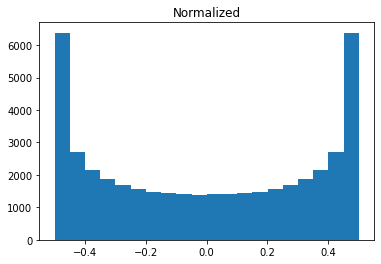

In [3]:
if os.name == "nt":
    # Si sous windows
    path = "files\\sine440.wav"
else:
    # Si sous linux
    path = "files/sine440.wav"
# Pas testé pour Mac
# path = pathlib.Path("files/sine440.wav") # devrai marcher pour Mac OS

quantifier = QuantifierComparator(path)
# La normalisation se fait dans l'initialisation de QuantifierComparator

quantifier.plot()
quantifier.plot_histo()
if enable_audio:
    sd.play(quantifier.data,quantifier.sp_rate)


On affiche le signal sur ses 300 premiers points, on voit bien une sinusoidal.

## 2/ Quantification pour N = 4 et A = 1

Nous allons modifier les parameter pour N = 4 et A = 1

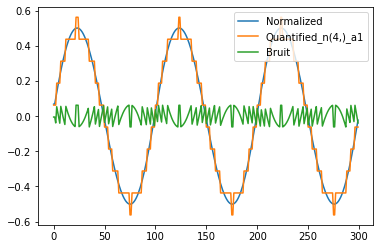

In [4]:
quantifier.quantify(n=4,a=1)
#Quantification avec les nouveaux parametre
quantifier.pack_in_df()
quantifier.plot()


On affiche le signal de base, le signal quantifier et le buit sur leurs 300 premiers points.
On peut clairement voir l'allure du signal changer lors de la quantification, s'approchant plus d'un signal echelonné

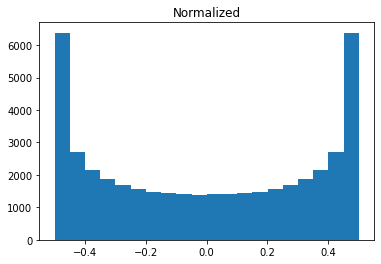

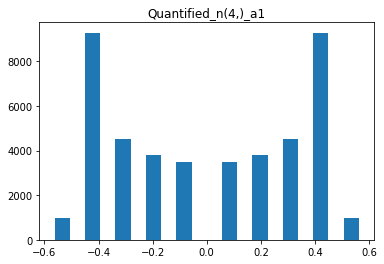

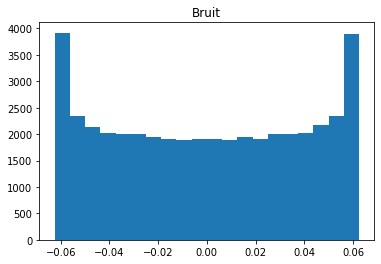

In [5]:
quantifier.plot_histo()

Ici nous affichons les histogrammes des 3 signaux


## 3 /Propriétés du bruit de quantification :

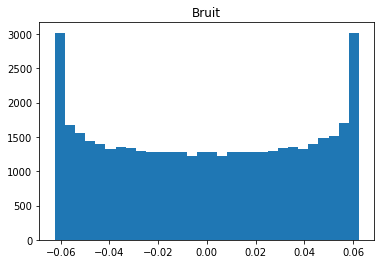

Var of noice : 0.001561920112624962


In [6]:
quantifier.plot_histo(quantifier.bruit_nom,30)
quantifier.calc_metrics()
print(f"Var of noice : {quantifier.var_noice}")

In [7]:
print(f"Moyenne du bruit : {quantifier.df[quantifier.bruit_nom].mean()}")
print(f"Variance du bruit : {quantifier.df[quantifier.bruit_nom].var()}")

Moyenne du bruit : 2.763190237032313e-05
Variance du bruit : 0.001561920112624962


On vous nous avons vu que la moyenne du bruit devais être nul, ici elle est très faible (voire négligeable) donc un résultat attendu.

## 4/ RSB pour A constant (A=1) et N entre [1;16]

In [8]:
RSB_var_n = {}
for i in range(1,17):
    quantifier.quantify(n=i,a=1)
    quantifier.pack_in_df()
    quantifier.calc_metrics()
    quantifier.calc_rsb()
    RSB_var_n[i] = quantifier.rsb

C:\Users\adrie\PycharmProjects\TP_audio\TP1\files\tools.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.rsb = self.var_signal / self.var_noice


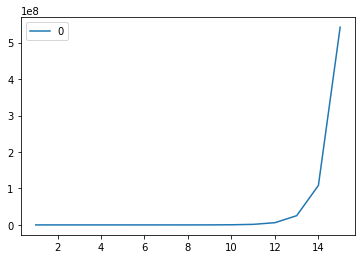

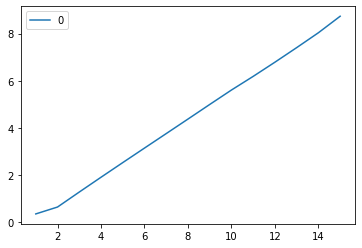

<AxesSubplot:>

In [9]:
plot_signal(pd.DataFrame(data=RSB_var_n.values(), index=RSB_var_n.keys()))
plot_signal(np.log10(pd.DataFrame(data=RSB_var_n.values(), index=RSB_var_n.keys())))

## 5/ Variation de A pour N = 8


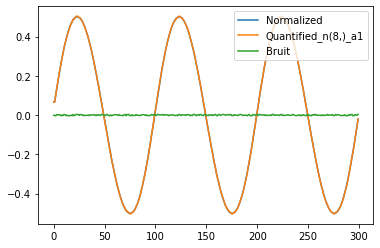

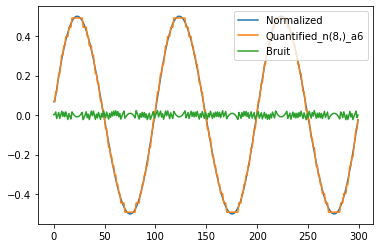

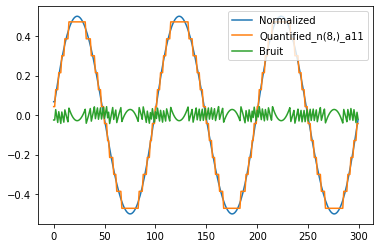

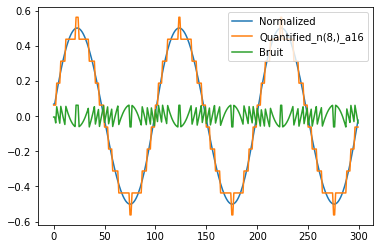

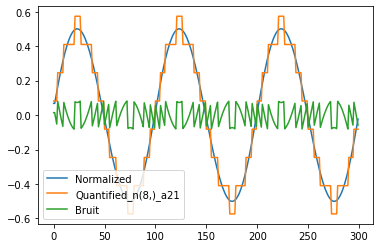

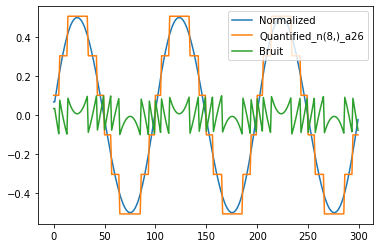

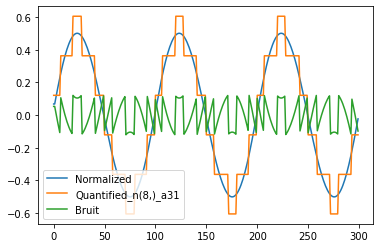

In [10]:
RSB_var_a = {}
for i in range(1,32,5):
    quantifier.reset_dataframe()
    quantifier.quantify(n=8,a=i)
    quantifier.pack_in_df()
    quantifier.calc_metrics()
    quantifier.calc_rsb()
    quantifier.calc_f()
    RSB_var_a[i] = quantifier.rsb
    quantifier.plot()


Nous avons fait varier a de 1 a 31 avec un pas de 5.
L'augmentation de A augmente beaucoup l'erreur

### 6 - (a):
#### On génere des données pour a de 1 a 60

In [11]:
RSB_var_a_f = {}
RSB_var_a = {}
for i in range(1,60):
    quantifier.reset_dataframe()
    quantifier.quantify(n=8,a=i)
    quantifier.pack_in_df()
    quantifier.calc_metrics()
    quantifier.calc_rsb()
    quantifier.calc_f()
    RSB_var_a[i] = quantifier.rsb
    RSB_var_a_f[np.log10(quantifier.f**2)] = quantifier.rsb


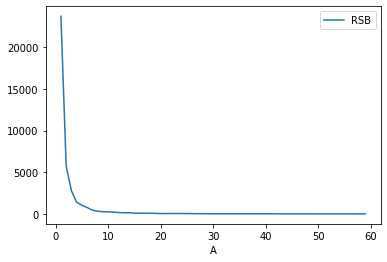

<AxesSubplot:xlabel='A'>

In [12]:
df = pd.DataFrame(RSB_var_a.values(), index=RSB_var_a.keys()).sort_index()
df.columns = ["RSB"]
df.index.name = "A"
plot_signal(df)

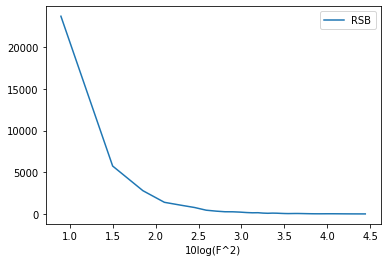

<AxesSubplot:xlabel='10log(F^2)'>

In [13]:
df = pd.DataFrame(RSB_var_a_f.values(), index=RSB_var_a_f.keys()).sort_index()
df.columns = ["RSB"]
df.index.name = "10log(F^2)"
plot_signal(df)

### 6 - (b):

In [14]:
RSB_var_b_f = {}
for i in range(1,15):
    quantifier.reset_dataframe()
    quantifier.quantify(n=i,a=1)
    quantifier.pack_in_df()
    quantifier.calc_metrics()
    quantifier.calc_rsb()
    quantifier.calc_f()
    RSB_var_b_f[np.log10(quantifier.f**2)] = quantifier.rsb

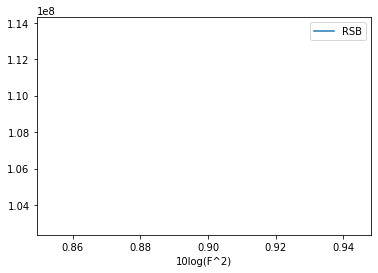

<AxesSubplot:xlabel='10log(F^2)'>

In [15]:
df = pd.DataFrame(RSB_var_b_f.values(), index=RSB_var_b_f.keys()).sort_index()
df.columns = ["RSB"]
df.index.name = "10log(F^2)"
plot_signal(df)

## 7

In [16]:
for i in range(1,15):
    quantifier.reset_dataframe()
    data = quantifier.quantify(n=i,a=1)
    sd.play(data,quantifier.sp_rate)
    sd.wait()
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


A partir de N = 9, le son semble identique que celui d'origine

# Rééchantillonnage et repliement spectral

## Rythmique

### 1/ Chargement du signal

In [17]:
if os.name == "nt":
    # Si sous windows
    path = "files\\rythmique.wav"
else:
    # Si sous linux
    path = "files/rythmique.wav"

In [18]:
freq_ech, data = wavfile.read(path)
print(f"Freq : {freq_ech} Hz")
x_r = data

Freq : 48000 Hz


C:\Users\adrie\AppData\Local\Temp\ipykernel_27016\3213688358.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_ech, data = wavfile.read(path)


## 2/ Affichage du signal

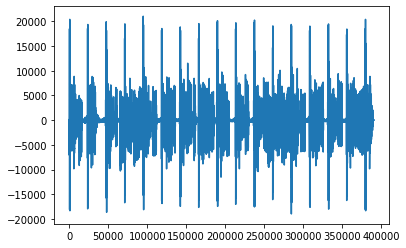

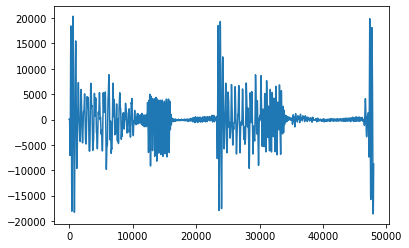

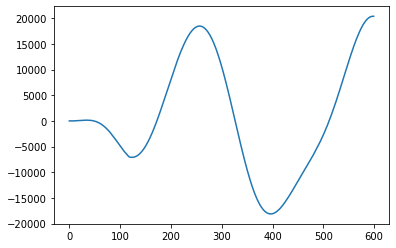

<AxesSubplot:>

In [19]:
df = pd.DataFrame(x_r)
df1 = df.iloc[:,1]
# Signal en entier (on utilise le deuxième signal)
plot_signal(df1,len(df.values))
# 1 sec de signal
plot_signal(df1,freq_ech)
# les 600 premiers points
plot_signal(df1,600)

On affiche le signal en entier, puis 1 sec et enfin les 600 premiers points

In [20]:
sd.play(df)

## 3/ Analyse en fréquence

Nous allons utiliser la fft pour trouver le spectre du signal

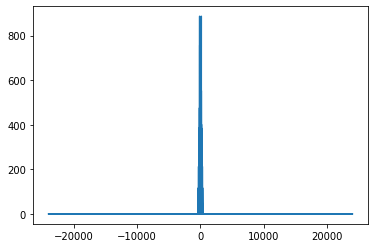

In [21]:
datay = fft.fft(df1)
nb = len(df1.values)
datax= fft.fftfreq(nb,1/freq_ech)
plt.plot(datax, 2.0/nb * np.abs(datay))
plt.show()

On peut voir que les fréquences sont approximativement comprise entre 0 et 1000 Hz, on va donc zoomer pour trouver une valeur plus precise.

(0.0, 1000.0, 0.0, 1000.0)

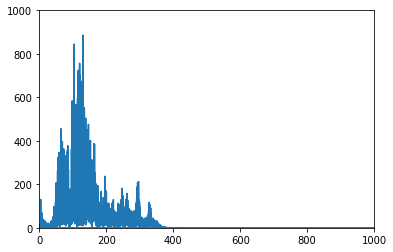

In [22]:
plt.plot(datax, 2.0/nb * np.abs(datay))
plt.axis([0,1000,0,1000])

Les fréquences sont donc comprises entre 0 et 400 Hz il serrait donc possible d'échantillonner a 800 Hz

In [23]:
Fmin = 800

In [24]:
f,t,sxx = spectrogram(df1,freq_ech,nperseg=10000)

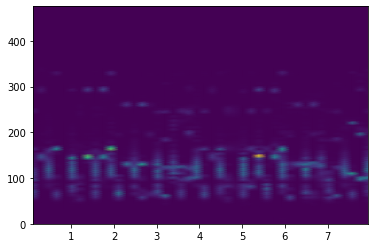

In [25]:
plt.pcolormesh(t, f[:100], sxx[:100,:], shading='gouraud')
plt.show()

Ici nous avons le spectre du signal

## 4/ Sous Échantillonnage

In [26]:
N = 60
sub_df = df1.iloc[::N]

# sd.play(df1.iloc[::N],int(freq_ech/N))
# J'ai eu des probleme de compatibiliter pour lire des frequence d'échantillonnage inférieur a 1024 donc j'ai enregistré le fichier wav puis lu ce dernier
wavfile.write("test.wav",int(freq_ech/N),sub_df)

## 5/ Comparaison du signal de base et du signal sous échantillonné

0             0
60         -457
120       -7062
180        2131
240       17399
          ...  
390360      -79
390420       41
390480       16
390540      -13
390600        6
Name: 1, Length: 6511, dtype: int16


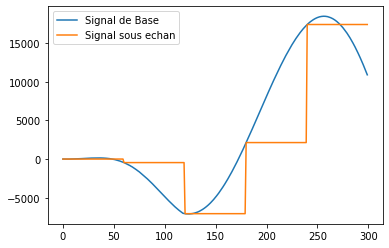

<AxesSubplot:>

In [27]:
print(sub_df)
ddf = pd.concat([df1,sub_df],axis=1).ffill()
ddf.columns = ["Signal de Base", "Signal sous echan"]
plot_signal(ddf)

Comparaison sur les 300 permiers points.

## 6/ Spectre du signal sous echantionné

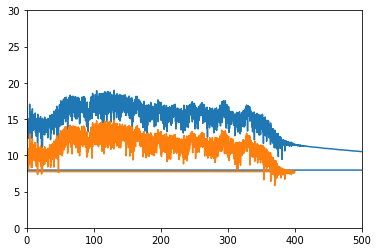

In [28]:
plt.plot(datax,np.log(np.abs(datay)))

nb_sub = len(sub_df)
datay_sub = fft.fft(sub_df)
freq = 800
datax_sub= fft.fftfreq(nb_sub,1/freq)
plt.plot(datax_sub, np.log(np.abs(datay_sub)))
plt.axis([0,500,0,30])
plt.show()



Les spectres des modules sont différents en amplitude, le signal de base a des valeurs plus élevées

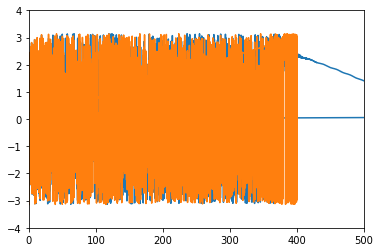

In [29]:
plt.plot(datax,np.angle(datay))

nb_sub = len(sub_df)
datay_sub = fft.fft(sub_df)
freq = 800
datax_sub= fft.fftfreq(nb_sub,1/freq)
plt.plot(datax_sub, np.angle(datay_sub))
plt.axis([0,500,-4,4])
plt.show()


Les spectres d'angle sont aussi différent

## 7/ Comparaison du signal de base et du signal sous échantillonné


In [30]:
wavfile.write("test.wav",800,sub_df)

Après ecoute les deux audio ne semble pas différent

## Piano

In [31]:
if os.name == "nt":
    # Si sous windows
    path = "files\\piano.wav"
else:
    # Si sous linux
    path = "files/piano.wav"

In [32]:
freq_ech, data = wavfile.read(path)
print(f"Freq : {freq_ech} Hz")
x_p = data

Freq : 44100 Hz


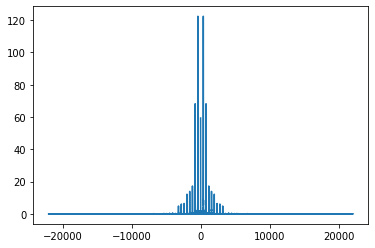

In [33]:
datay = fft.fft(x_p)
nb = len(x_p)
datax= fft.fftfreq(nb,1/freq_ech)
plt.plot(datax, 2.0/nb * np.abs(datay))
plt.show()

In [43]:
class SubSample:
    def __init__(self, path):
        self.freq_ech, self.data = wavfile.read(path)
        self.base_df = pd.DataFrame(self.data)
        self.sub_df = None
        self.sub_data = None
        self.sub_df_freq = None
        self.df = pd.DataFrame()
        self.df["base"] = self.data

    def specter(self,range_plot=None,show=True):
        values = fft.fft(self.data)
        nb_point = len(self.data)
        freqs= fft.fftfreq(nb_point, 1 / self.freq_ech)
        fig = plt.plot(freqs, 2.0 / nb_point * np.abs(values))
        if range_plot is not None:
            plt.axis(range_plot)
        if show:
            plt.show()
        return fig

    def sub_specter(self,range_plot=None,show=True):
        values = fft.fft(self.sub_data)
        nb_point = len(self.sub_data)
        freqs= fft.fftfreq(nb_point, 1 / self.sub_df_freq)
        fig = plt.plot(freqs, 2.0 / nb_point * np.abs(values))
        if range_plot is not None:
            plt.axis(range_plot)
        if show:
            plt.show()
        return fig


    def sub_sample(self,n):
        freq = int(self.freq_ech/n)
        self.sub_df = pd.DataFrame(self.base_df[::n])
        self.sub_df_freq = freq
        self.sub_data = self.sub_df.values[:,0]
        self.df[f"sub_n{n}"] = self.sub_df
        return self.sub_data


    def play_sound(self):
        sd.play(self.base_df,self.freq_ech)

    def play_sub_sound(self):
        sd.play(self.sub_df,self.sub_df_freq)



In [44]:
sub = SubSample(path)
xp = sub.data

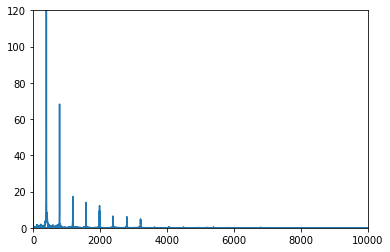

In [45]:
xp_specter = sub.specter([0,10000,0,120])
sub.play_sound()

Pour éviter le repliement spectral on va choisir une fréquence d'échantillonnage d'environ 8000 Hz car le dernier pic en fréquence est vers 4000 Hz

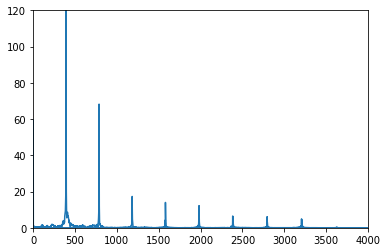

In [52]:
xp_specter = sub.specter([0,4000,0,120])

## 10/ Sous échantillonnage

### On sous-échantillonne avec la fréquence choisie de 8000 Hz

In [46]:
f_min = 8000

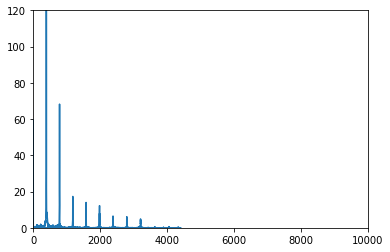

In [47]:
n = int(sub.freq_ech/f_min)
xp1 = sub.sub_sample(n)
xp1_specter = sub.sub_specter([0,10000,0,120])

On peut voir que les spectres sont sensiblement similaire

### Sous échantillonnage a 1024 Hz

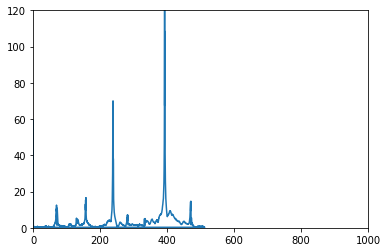

In [51]:
n = int(sub.freq_ech/1024)
xp2 = sub.sub_sample(n)
xp2_specter = sub.sub_specter([0,1000,0,120])

Le pic en 400hz est resté, mais des nouveaux pics sont apparus dans des plus basses fréquences.

En effet le pic vers 220 Hz a un valeur d'environs 70, pouvant correspondre (en termes de valeur) au pic du signal de base a 800 Hz
On observe ici un repliment spectral du a un fréquence d'échantillonnage trop basse

## 12/ Comparaisons de signaux

<AxesSubplot:>

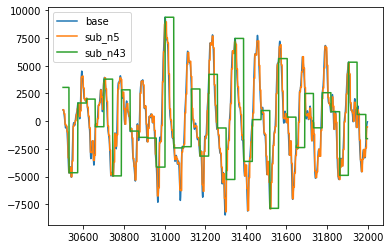

In [40]:
sub.df.ffill().iloc[30500:32000].plot()

Signal de base

In [55]:
sub.play_sound()

Signal échantillonné avec n = 5

In [56]:
n = int(sub.freq_ech/f_min)
sub.sub_sample(n)
sub.play_sub_sound()

Signal échantillonné avec n = 43

In [57]:
n = int(sub.freq_ech/1024)
sub.sub_sample(n)
sub.play_sub_sound()

La différence entre le signal de base et celui échantillonné a n = 5 sont relativement similaire, on peut déceler une faible diminution de la qualité.

Pas contre, le signal échantillonné avec n = 43 n'est plus du tout reconnaissable.